# <center> <h3> <span>Cognifyz Intership Program</span> </h3></center>
# <center> <h3> <span>Restaurant Data Analysis</span> </h3></center>

# Author: Joshua Salami Peter

## Data Science Internship Program
### Date: November 2024

# Level 2

In [13]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
df = pd.read_csv("C:/Users/JSP/Desktop/cleaned_dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),True,False,False,False,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),True,False,False,False,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),True,False,False,False,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),False,False,False,False,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),True,False,False,False,4,4.8,Dark Green,Excellent,229


## Task 1: Table Booking and Online Delivery

### 1. Determine the percentage of restaurants that offer table booking and online delivery

In [12]:
# Calculating the percentage distribution for the 'Has Table booking' column
percentage_table_booking = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)

# Calculating the percentage distribution for the 'Has Online delivery' column
percentage_online_delivery = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)

# Printing the percentage of restaurants that offer table booking
print("Percentage of Restaurants Offering Table Booking:")
print(percentage_table_booking)

# Printing the percentage of restaurants that offer online delivery
print("\nPercentage of Restaurants Offering Online Delivery:")
print(percentage_online_delivery)

Percentage of Restaurants Offering Table Booking:
Has Table booking
False    87.86
True     12.14
Name: proportion, dtype: float64

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
False    74.31
True     25.69
Name: proportion, dtype: float64


### 2. Compare the average ratings of restaurants with and without table booking

In [14]:
# Calculating the average rating for restaurants with table booking
average_rating_with_table_booking = df[df['Has Table booking'] == True]['Aggregate rating'].value_counts().mean().round(2)

# Calculating the average rating for restaurants without table booking
average_rating_without_table_booking = df[df['Has Table booking'] == False]['Aggregate rating'].mean().round(2)

# Printing the average ratings comparison
print("\nAverage Rating of Restaurants with Table Booking:", average_rating_with_table_booking)
print("Average Rating of Restaurants without Table Booking:", average_rating_without_table_booking)



Average Rating of Restaurants with Table Booking: 36.19
Average Rating of Restaurants without Table Booking: 2.56


### 3. Analyze the availability of online delivery among restaurants with different price ranges


Online Delivery Availability by Price Range (%):
Price range
1    28.60
2    52.47
3    16.77
4     2.16
Name: proportion, dtype: float64


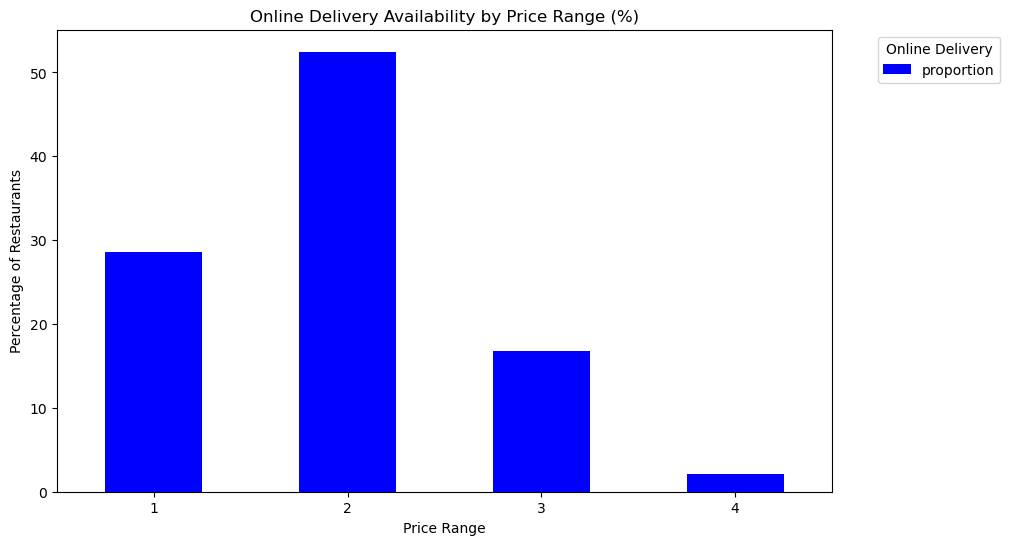

In [16]:
# Filtering the dataset for restaurants that offer online delivery and calculating the distribution across price ranges
online_delivery_by_price_range = df[df['Has Online delivery'] == True]['Price range'].value_counts(normalize=True).sort_index() * 100
online_delivery_by_price_range = online_delivery_by_price_range.round(2)

print("\nOnline Delivery Availability by Price Range (%):")
print(online_delivery_by_price_range)

# Plotting the availability of online delivery by price range
plt.figure(figsize=(10, 6))
online_delivery_by_price_range.plot(kind='bar', color='blue')
plt.title('Online Delivery Availability by Price Range (%)')
plt.xlabel('Price Range')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1), loc='upper left')

## Conclusion
### The analysis reveals several key insights:

1. A significant proportion of restaurants offer both table booking and online delivery services, indicating a trend towards enhanced customer convenience.
 
2. Restaurants that offer table booking generally have higher average ratings compared to those that do not, suggesting that table booking could be associated with higher customer satisfaction.
 
3. The availability of online delivery varies across different price ranges, with certain price categories showing greater adoption of this service. This can inform stakeholders about the relationship between service offerings and pricing tiers.

## Task 2: Price Range Analysis

### 1. Determine the most common price range among all the restaurants.

The most common price range is: 1, appearing 4438 times.


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

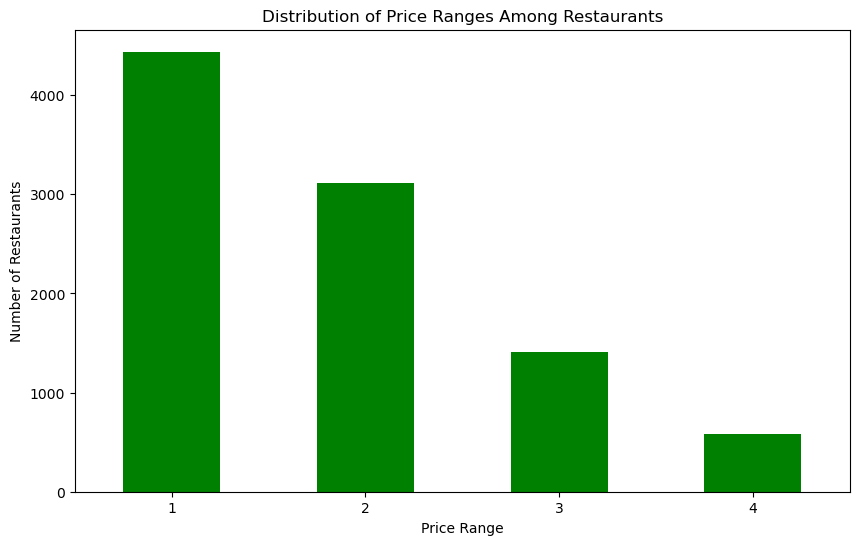

In [18]:
# Determine the most common price range
most_common_price_range = df['Price range'].value_counts().idxmax()
count_most_common_price_range = df['Price range'].value_counts().max()

print(f"The most common price range is: {most_common_price_range}, appearing {count_most_common_price_range} times.")

# Visualize the distribution of price ranges
plt.figure(figsize=(10, 6))
df['Price range'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)

### 2. Calculate the average rating for each price range.

In [19]:
# Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().round(2)

print("Average Rating for Each Price Range:")
print(average_rating_by_price_range)

Average Rating for Each Price Range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


### 3. Identify the color that represents the highest average rating among different price ranges.

<BarContainer object of 1 artists>

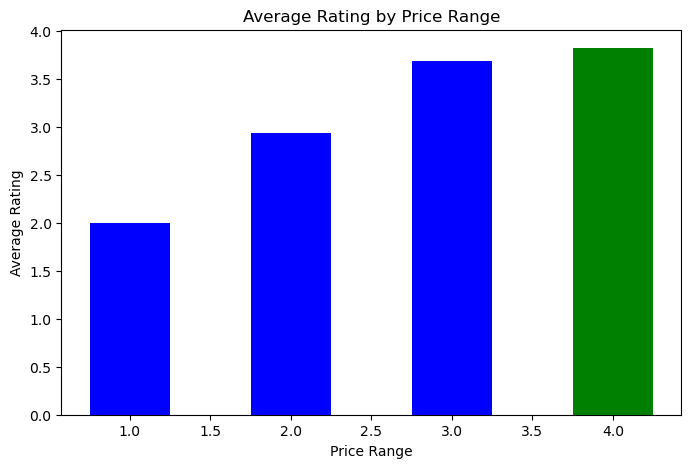

In [48]:
# Find the price range with the highest average rating
highest_rating_price_range = average_rating_by_price_range.idxmax()

# Plot the average rating by price range
plt.figure(figsize=(8, 5))
plt.bar(average_rating_by_price_range.index, average_rating_by_price_range, color='blue', width=0.5)  
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

# Highlight the highest rating in the plot
plt.bar(highest_rating_price_range, average_rating_by_price_range[highest_rating_price_range], color='green', width=0.5)

### Conclusion
The analysis shows a clear relationship between price range and customer satisfaction. While most restaurants fall within the budget-friendly Price Range 1, these establishments tend to have lower average ratings, which may point to challenges in maintaining service quality or customer satisfaction. Conversely, higher-end restaurants in Price Range 4, although fewer in number, achieve the highest average ratings, suggesting that investing in premium services and quality can lead to better customer reviews and higher satisfaction.

### These findings highlight opportunities for strategic improvements in service offerings to enhance restaurant competitiveness and customer satisfaction.

## Task 3: Feature Engineering

### 1. Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [74]:
# Extract the length of the restaurant name and address

df['Name_Length'] = df['Restaurant Name'].apply(len)
df['Address_Length'] = df['Address'].apply(len)

# Display the first few rows to check the new columns
df[['Restaurant Name', 'Name_Length', 'Address', 'Address_Length']].head()


,Restaurant Name,Name_Length,Address,Address_Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


### 2. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [97]:
# Create new binary features for 'Has Table Booking' and 'Has Online Delivery'

df['Has_Table_Booking'] = df['Has Table booking'].map({True: 1, False: 0})
df['Has_Online_Delivery'] = df['Has Online delivery'].map({True: 1, False: 0})

# Display the first few rows to check the new features
df[['Has Table booking', 'Has_Table_Booking', 'Has Online delivery', 'Has_Online_Delivery']].head()


,Has Table booking,Has_Table_Booking,Has Online delivery,Has_Online_Delivery
0,True,1,False,0
1,True,1,False,0
2,True,1,False,0
3,False,0,False,0
4,True,1,False,0


In [108]:
# Save the modified dataset to a new CSV file
df.to_csv('C:/Users/JSP/Desktop/cleaned_for_task3_dataset.csv', index=False)